## What is an Imbalanced Dataset?
##### Use in those problems where the output is in categorical. such as 1000 dataset and have 900 "yes" and 100 is "No". There are two tchniques by whic we solve such kind of problems 1) is Upsampling and 2) is Downsampling 


## Upsampling 
##### increasing the number of points in the minority class
## Downsampling 
##### decreasing the number of points in the majority class

In [14]:
import numpy as np
import pandas as pd

In [15]:
np.random.seed(123)

In [16]:
n_simples = 1000
class_0_ratio = 0.9

n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0



In [17]:
n_class_0,n_class1

(900, 100)

In [20]:
# create a dataset 
class_2 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc = 0, scale = 1, size = n_class_0),
    'Feature_2' : np.random.normal(loc= 0, scale=1, size= n_class_0),
    'target' : [0] * n_class_0
})

class_3 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc= 2, scale=1, size = n_class_1 ),
    'Feature_2' : np.random.normal(loc=2, scale=1, size= n_class_1),
    'target' : [1] * n_class_1
})

In [21]:
df = pd.concat([class_2,class_3]).reset_index(drop = True)

In [22]:
df.head()

,Feature_1,Feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [23]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

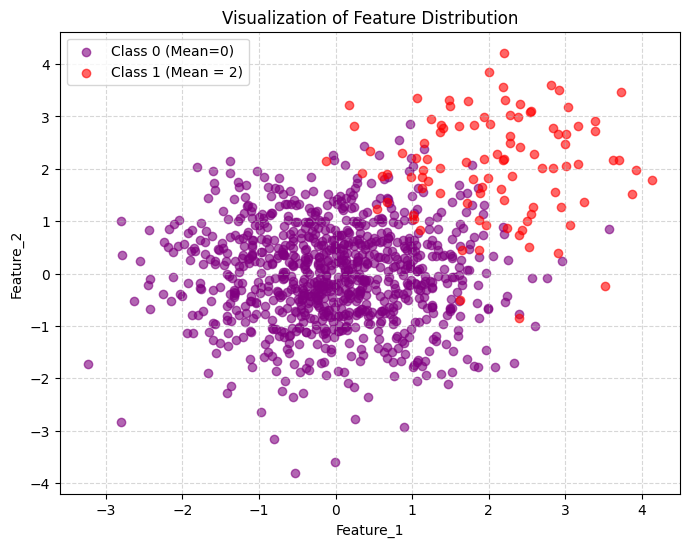

In [28]:
plt.figure(figsize=(8,6))

plt.scatter(class_2['Feature_1'],class_2['Feature_2'],
color = 'purple', label = 'Class 0 (Mean=0)',alpha = 0.6)

plt.scatter(class_3['Feature_1'],class_3['Feature_2'],
color = 'red', label = 'Class 1 (Mean = 2)',alpha = 0.6)

plt.title("Visualization of Feature Distribution")
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.grid(True,linestyle='--',alpha = 0.5)

plt.show()

In [29]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [31]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 602.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 483.3 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [32]:
from sklearn.utils import resample


In [34]:
df_minority_updated = resample(df_minority,replace = True,
    n_samples = len(df_majority),
    random_state = 42
    )

In [35]:
df_minority_updated.shape

(900, 3)

In [36]:
df_minority_updated.head()

,Feature_1,Feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [37]:
df_majority_updated = resample(df_majority,replace=True,
    n_samples = len(df_minority),
    random_state = 42
    )


In [38]:
df_majority_updated.shape

(100, 3)

In [40]:
df_majority_updated.head()

,Feature_1,Feature_2,target
102,0.712265,0.718151,0
435,1.199988,0.574621,0
860,0.304515,-0.759475,0
270,-1.213385,0.675504,0
106,0.179549,-0.202659,0
